In [11]:
from utils import *
from src.filters import *
from src.EdgeDetection import *
from src.noises import *
from src.Histogram import *
from src.Hybrid import *
from src.Threshold import *

In [12]:
from matplotlib import image
import numpy as np
from PIL import Image, ImageOps
from src.CannyEdgeDetection import *
from src.gaussian_smoothing import *
import matplotlib.pyplot as plt

In [13]:
# Let's first create a zero image with the same dimensions of the loaded image
image_path='Images/apple.jpeg'
image = mpimg.imread(image_path)
gray_image = from_RGB_to_GS(image)

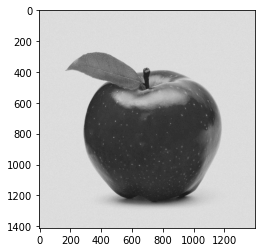

In [15]:
# 1- Adding noise to Image [Gaussian noise, Uniform noise, Salt & Pepper]
gaussian_noise = generate_noise(image, "gaussian_noise")
uniform_noise = generate_noise(image, "uniform_noise")

gauss_image = image_plus_noise(gray_image, gaussian_noise)
display_image(gauss_image, "Gray")


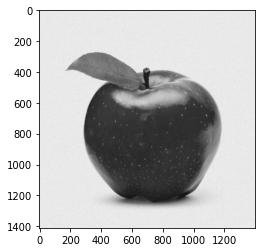

In [16]:
uniform_image = image_plus_noise(gray_image, uniform_noise)
display_image(uniform_image, "Gray")

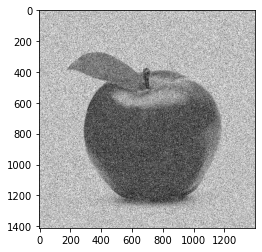

In [19]:
sp_image = sp_noise(gray_image,0.25)
display_image(sp_image, "Gray")

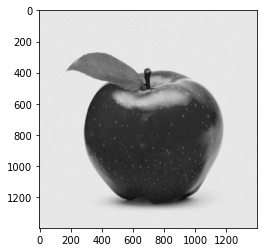

In [19]:
# 2- filter the noise

gauss_kernal = gaussian_filter(3, 3, 1/2)
convolved_image = Convolution(gauss_image, gauss_kernal)
display_image(convolved_image, "Gray")

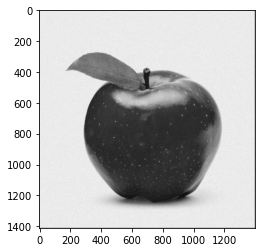

In [20]:
avg_filter = average_filter(3, uniform_image)
display_image(avg_filter, "Gray")

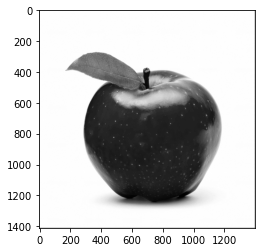

In [22]:
medianFilter = median_filter(sp_image)
display_image(medianFilter, "Gray")

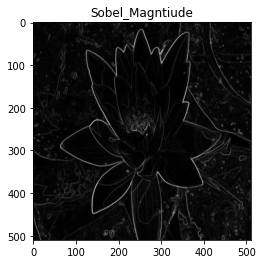

In [23]:
# 3-edge detection
mag,_=Sobel_Edgd_Detection('Images/Flower.jpeg')
plt.imshow(mag, cmap='gray')
plt.title("Sobel_Magntiude")
plt.show()


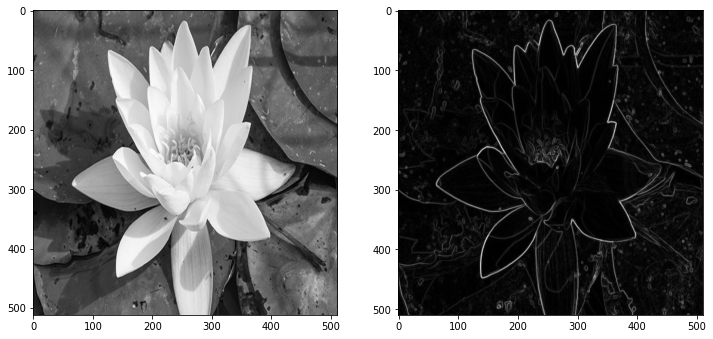

In [24]:
Prewitt_Edge_Detection('Images/Flower.jpeg')

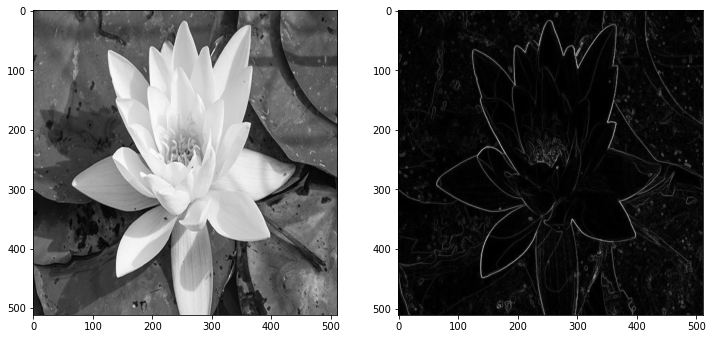

In [25]:
Roberts_Edgd_Detection('Images/Flower.jpeg')

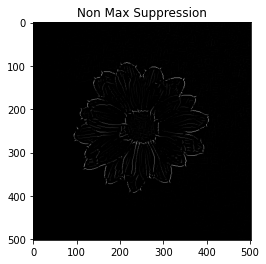

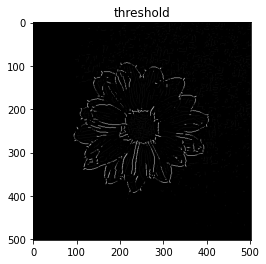

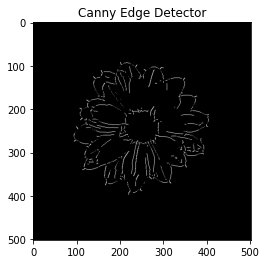

In [4]:
image = Read_GrayScale_Image('Images/flower2.jpeg')
    
blurred_image = gaussian_blur(image, kernel_size=9)

Sobel_Magntiude, Sobel_direction = Sobel_Edgd_Detection(blurred_image)

new_image = non_max_suppression(
gradient_magnitude=Sobel_Magntiude, gradient_direction=Sobel_direction)

weak = 20

new_image = threshold(new_image, 5, 50, weak=weak)

new_image = hysteresis(new_image, weak)

plt.imshow(new_image, cmap='gray')
plt.title("Canny Edge Detector")
plt.show()

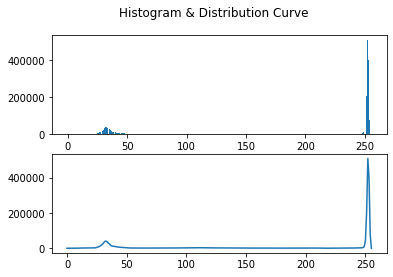

In [5]:
# 4- Draw histogram and distribution curve
Pixels,Freqs=(HistDistFun(gray_image))
fig, axs = plt.subplots(2)
fig.suptitle('Histogram & Distribution Curve')
axs[0].bar(Pixels,Freqs)
axs[1].plot(Pixels,Freqs)        
plt.show()

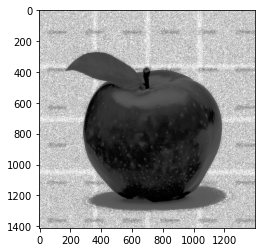

In [6]:
# 5- Equalize the image
equalized_image = image_equalization(gray_image)
display_image(equalized_image, "Gray") 

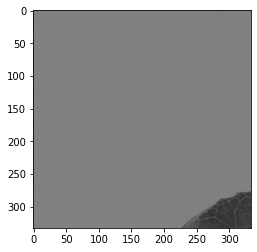

In [7]:
# 6- Normalize the image
normalized_image= normalization(cols=333, rows=333, x_min=0, x_max=255, x_new_min=0, x_new_max=130, Img=gray_image)
display_image(normalized_image, "Gray")

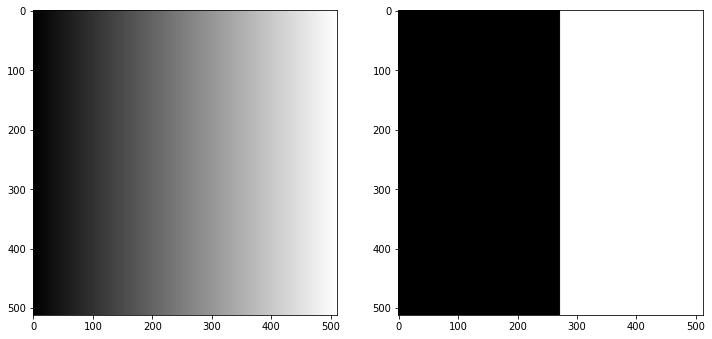

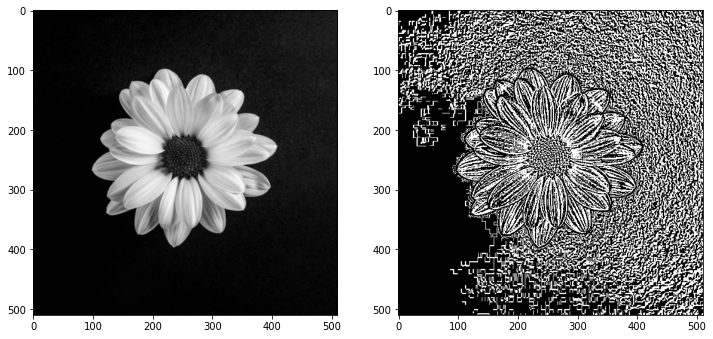

In [8]:
# 7- Local and global thresholding
Global_Thershold(image='Images/white.jpeg')
Local_Thershold(image='Images/flower2.jpeg', mode="Mean")

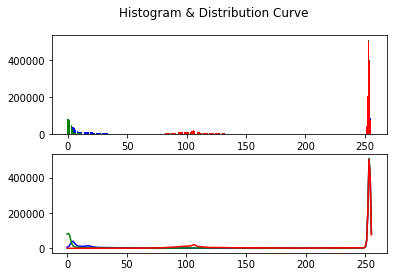

In [14]:
# 8- RGB Histograms and Distrubution functions
BluePixels,GreenPixels,RedPixels,BlueFreqs,GreenFreqs,RedFreqs=RGBHistDistFun(image)
fig1, axs1 = plt.subplots(2)
fig1.suptitle('Histogram & Distribution Curve')
axs1[0].bar(BluePixels, BlueFreqs,color='blue')
axs1[0].bar(GreenPixels, GreenFreqs,color="green")
axs1[0].bar(RedPixels, RedFreqs,color="red")
axs1[1].plot(BluePixels, BlueFreqs,color='blue')
axs1[1].plot(GreenPixels, GreenFreqs,color="green")
axs1[1].plot(RedPixels, RedFreqs,color="red")
plt.show()

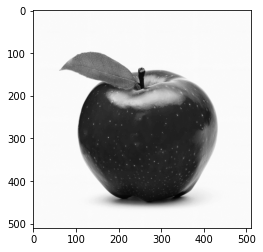

In [15]:
# 9- Frequency domain filters (high pass and low pass)
hpass=highpass_filter(image_path)
#plot(hpass, 'Simple 3x3 highpass')
display_image(hpass, "Gray")

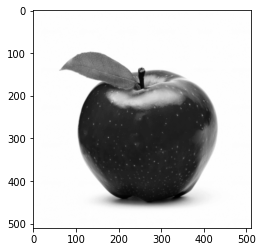

In [16]:
lpass=lowpass_filter(image_path)
#plot(lpass, 'Simple 3x3 Lowpass')
display_image(lpass, "Gray")

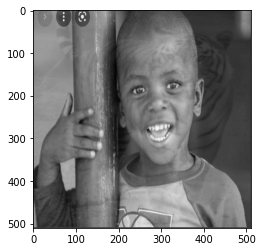

In [17]:
# 10- Hybrid images
img1='Images/boy.JPG'
img2='Images/tiger2.JPG'
hybrid=hybrid_image(img1,img2)
display_image(hybrid, "Gray")
